In [1]:
#Block 1 server setup 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
#Block 2 sync colabserver with drive
!mkdir -p drive
!google-drive-ocamlfuse drive


In [0]:
#ls drive/NumtaDB
BASE = "drive/NumtaDB/"

In [0]:
from imgaug import augmenters as iaa
from keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.math import add_n
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from PIL import Image
from keras import losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers.merge import add, concatenate
BASE = "drive/NumtaDB/"
X_train = np.load(BASE+'x_train_all_64.npy')
Y_train = np.load(BASE+'x_label_all_64.npy')
#X_train = X_train[:len(X_train)//2]
#Y_train = Y_train[:len(Y_train)//2]
print(len(X_train))
print(len(Y_train))
print(X_train.shape)
print(Y_train.shape)

72045
72045
(72045, 64, 64, 3)
(72045, 10)


In [0]:
from imgaug import augmenters as iaa
from keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.math import add_n
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from PIL import Image
from keras import losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers.merge import add, concatenate
BASE = "drive/NumtaDB/"
X_train = np.load(BASE+'x_train_all_64.npy')
Y_train = np.load(BASE+'x_label_all_64.npy')
#X_train = X_train[:len(X_train)//2]
#Y_train = Y_train[:len(Y_train)//2]
print(len(X_train))
print(len(Y_train))
print(X_train.shape)
print(Y_train.shape)



from sklearn.model_selection import KFold
from keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.engine.topology import Layer
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
import sys

aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)
aug3 = iaa.Multiply((0.8, 1.2), per_channel=0.2)
aug4 = iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-45, 45),
        shear=(-8, 8))

aug5 = iaa.CoarseDropout(p=0.2, size_percent = 0.15)
aug6 = iaa.ContrastNormalization((0.75, 1.5))
aug7 = iaa.Pepper(p=0.05)
l2_lambda = 0.0001
def augment_img(img):
    
    i = np.random.randint(0,9)

    if i==0:
        img_adapteq = img

    elif i==1:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==2:
        img_adapteq = aug2.augment_image(img)

    elif i==3:
        img_adapteq = aug3.augment_image(img)

    elif i==4:
        img_adapteq = aug4.augment_image(img)  
 
    elif i==5:
        img_adapteq = aug5.augment_image(img)  

    elif i==6:
        img_adapteq = aug6.augment_image(img)  
 
    elif i==7:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug7.augment_image(img_adapteq)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==8:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug2.augment_image(img_adapteq)
    
    img_adapteq = img_adapteq.astype('float32')
    img_adapteq /= 255.

    return img_adapteq


def MultiHeadsAttModel(l=8*8, d=512, dv=64, dout=512, nv = 8 ): #l=6*6, d=64*3 , dv=8*3, dout=32, nv = 8
    v1 = Input(shape = (l, d))
    q1 = Input(shape = (l, d))
    k1 = Input(shape = (l, d))

    v2 = Dense(dv*nv, activation = "relu")(v1) # we want every encoding to 64*3 as the initial encoding so dv*nv 8*3*8 W_V
    q2 = Dense(dv*nv, activation = "relu")(q1) #same W_Q
    k2 = Dense(dv*nv, activation = "relu")(k1) #same W_K

    v = Reshape([l, nv, dv])(v2) # for all the nv attention heads find those components
    q = Reshape([l, nv, dv])(q2) 
    k = Reshape([l, nv, dv])(k2) 

    att = Lambda(lambda x: K.batch_dot(x[0],x[1] ,axes=[-1,-1]) / np.sqrt(dv),
                 output_shape=(l, nv, nv))([q,k])# l, nv, nv
    att = Lambda(lambda x:  K.softmax(x) , output_shape=(l, nv, nv))(att)

    out = Lambda(lambda x: K.batch_dot(x[0], x[1],axes=[4,3]),  output_shape=(l, nv, dv))([att, v])
    out = Reshape([l, d])(out)
    
    out = Add()([out, q1])

    out = Dense(dout, activation = "relu")(out)
    m = Model(inputs=[q1,k1,v1], outputs=out)
    from keras.utils import plot_model
    plot_model(m, to_file='m.png', show_shapes=True)
    from IPython.display import Image
    Image(filename='m.png')
    return  Model(inputs=[q1,k1,v1], outputs=out)

class NormL(Layer):

    def __init__(self, **kwargs):
        super(NormL, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.a = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='ones',
                                      trainable=True)
        self.b = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='zeros',
                                      trainable=True)
        super(NormL, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        eps = 0.000001
        mu = K.mean(x, keepdims=True, axis=-1)
        sigma = K.std(x, keepdims=True, axis=-1)
        ln_out = (x - mu) / (sigma + eps)
        return ln_out*self.a + self.b

    def compute_output_shape(self, input_shape):
        return input_shape

class LearningRateDecay(Callback):
    '''Learning rate scheduler.
    # Arguments
        schedule: a function that takes an epoch index as input
            (integer, indexed from 0) and returns a new
            learning rate as output (float).
    '''
    def __init__(self, decay, every_n=1, verbose=0):
        Callback.__init__(self)
        self.decay = decay
        self.every_n = every_n
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        if not (epoch and epoch % self.every_n == 0):
            return

        assert hasattr(self.model.optimizer, 'lr'), \
            'Optimizer must have a "lr" attribute.'
        current_lr = K.get_value(self.model.optimizer.lr)
        new_lr = current_lr * self.decay
        if self.verbose > 0:
            print(' \nEpoch %05d: reducing learning rate' % (epoch))
            sys.stderr.write('new lr: %.5f\n' % new_lr)
        K.set_value(self.model.optimizer.lr, new_lr)
              
      
if __name__ == '__main__':   

    nb_classes = 10

    # the data, shuffled and split between tran and test sets
    #(X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("X_train original shape", X_train.shape)
    print("y_train original shape", Y_train.shape)
   
    #X_train = X_train.astype('float32')
    #X_test = X_test.astype('float32')
    #X_train /= 255.0
    #X_test /= 255.0
    

    #Y_train = np_utils.to_categorical(y_train, nb_classes)
    #Y_test = np_utils.to_categorical(y_test, nb_classes)
    
    inp = Input(shape = (64,64,3))
    x = Conv2D(16, (5, 5), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(inp)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64*3, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    #x = BatchNormalization()(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = GlobalAveragePooling2D()(x)
    '''
    x = Conv2D(32,(2,2),activation='relu', padding='same')(inp)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64,(2,2),activation='relu',padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64,(2,2),activation='relu',padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64*3,(2,2),activation='relu')(x)
    '''
    print(x.shape)
    
    m = Model(inputs = [inp],outputs =  x)
    #print(m.summary)
    
    if True:
        x = Reshape([8*8,64*3])(x) #number of words(6*6) * it's encoding(64*3) output by the encoder     
        att = MultiHeadsAttModel(l=8*8, d=64*3 , dv=8*3, dout=32, nv = 8 )
        x = att([x,x,x])#sent to the decoder to use attention heads to decode 
        x = Reshape([8,8,32])(x)
        x = NormL()(x)
    
    x = Flatten()(x) 
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    print(model.summary())
    from keras.utils import plot_model
    plot_model(model, to_file='model.png', show_shapes=True)
    from IPython.display import Image
    Image(filename='model.png')
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    #tbCallBack = TensorBoard(log_dir='./Graph/mhatt1', histogram_freq=0, write_graph=True, write_images=True)
    model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', 
                      metrics = ['accuracy'])
    BS = 500
    callbacks = [EarlyStopping(monitor='val_acc', patience=20, verbose=1, min_delta=1e-6),
             LearningRateDecay(0.5, every_n = 8, verbose=1),
             ModelCheckpoint(filepath= BASE + 'BEST_visual_atention_Callbacks_kfold5_v2' + '.hdf5', verbose=1,monitor = 'val_acc',
                             save_best_only=True, save_weights_only=True, mode='auto')]
    
    
    X_train_all = X_train.reshape(len(X_train), 64,64,3)
    #Y_train_all = X_test.reshape(len(X_test), 64,64,3)
    
    kf = KFold(n_splits=5, shuffle=True)
    #X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
    for train_index, test_index in kf.split(X_train_all):
        #print(train_index)
        X_train = X_train_all[train_index]; X_test = X_train_all[test_index]
        y_train = Y_train[train_index]; y_test = Y_train[test_index]
        train_datagen = ImageDataGenerator(preprocessing_function=augment_img)
        train_datagen.fit(X_train)
        model.load_weights(filepath= BASE + 'BEST_visual_atention_Callbacks_kfold5_v2' + '.hdf5')
        model.fit_generator(train_datagen.flow(X_train, y_train , batch_size = BS),
              epochs=10, verbose=1, validation_data = (X_test.astype('float32')/255.0, y_test),callbacks = callbacks,
                    steps_per_epoch=int(len(X_train))//BS,
                    validation_steps=int(len(X_test))/BS
                   )
    
    '''
    model.fit(X_train, y_train,
              batch_size=500, 
              epochs=100,
              verbose=1,          
              validation_data=(X_test, y_test)
              #callbacks=[tbCallBack]
             )
    '''

W0827 12:49:31.542692 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 12:49:31.580319 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 12:49:31.590411 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 12:49:31.642392 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0827 12:49:31.643372 1397502140

72045
72045
(72045, 64, 64, 3)
(72045, 10)
X_train original shape (72045, 64, 64, 3)
y_train original shape (72045, 10)


W0827 12:49:35.153684 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0827 12:49:35.564655 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



(?, 8, 8, 192)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 16)   6416        batch_normalization_1[0][0]      
______________________________________________________________________________________________

W0827 12:49:37.408972 139750214027136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 12:49:44.828289 139750214027136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
115/115 [==============================] - 78s 683ms/step - loss: 0.1858 - acc: 0.9651 - val_loss: 0.1416 - val_acc: 0.9796

Epoch 00001: val_acc improved from -inf to 0.97960, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 2/10
115/115 [==============================] - 68s 592ms/step - loss: 0.1664 - acc: 0.9712 - val_loss: 0.1260 - val_acc: 0.9831

Epoch 00002: val_acc improved from 0.97960 to 0.98307, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 3/10
115/115 [==============================] - 67s 585ms/step - loss: 0.1613 - acc: 0.9727 - val_loss: 0.2541 - val_acc: 0.9447

Epoch 00003: val_acc did not improve from 0.98307
Epoch 4/10
115/115 [==============================] - 67s 585ms/step - loss: 0.1597 - acc: 0.9734 - val_loss: 0.1167 - val_acc: 0.9868

Epoch 00004: val_acc improved from 0.98307 to 0.98681, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 5/10
115/1

new lr: 0.00050


115/115 [==============================] - 67s 587ms/step - loss: 0.1189 - acc: 0.9829 - val_loss: 0.0908 - val_acc: 0.9921

Epoch 00010: val_acc improved from 0.99042 to 0.99209, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 1/10
115/115 [==============================] - 68s 595ms/step - loss: 0.1140 - acc: 0.9838 - val_loss: 0.0706 - val_acc: 0.9974

Epoch 00001: val_acc improved from 0.99209 to 0.99736, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 2/10
115/115 [==============================] - 68s 588ms/step - loss: 0.1082 - acc: 0.9850 - val_loss: 0.0713 - val_acc: 0.9969

Epoch 00002: val_acc did not improve from 0.99736
Epoch 3/10
115/115 [==============================] - 67s 587ms/step - loss: 0.1041 - acc: 0.9859 - val_loss: 0.0722 - val_acc: 0.9963

Epoch 00003: val_acc did not improve from 0.99736
Epoch 4/10
115/115 [==============================] - 68s 587ms/step - loss: 0.1047 - acc: 0.9852 - val_l

new lr: 0.00025


115/115 [==============================] - 67s 587ms/step - loss: 0.0883 - acc: 0.9883 - val_loss: 0.0630 - val_acc: 0.9964

Epoch 00010: val_acc did not improve from 0.99736
Epoch 1/10
115/115 [==============================] - 68s 595ms/step - loss: 0.1069 - acc: 0.9860 - val_loss: 0.0673 - val_acc: 0.9981

Epoch 00001: val_acc improved from 0.99736 to 0.99806, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 2/10
115/115 [==============================] - 68s 588ms/step - loss: 0.1028 - acc: 0.9871 - val_loss: 0.0694 - val_acc: 0.9972

Epoch 00002: val_acc did not improve from 0.99806
Epoch 3/10
115/115 [==============================] - 68s 587ms/step - loss: 0.0983 - acc: 0.9877 - val_loss: 0.0668 - val_acc: 0.9973

Epoch 00003: val_acc did not improve from 0.99806
Epoch 4/10
115/115 [==============================] - 68s 587ms/step - loss: 0.0945 - acc: 0.9883 - val_loss: 0.0658 - val_acc: 0.9973

Epoch 00004: val_acc did not improve from 0.99806


new lr: 0.00013


115/115 [==============================] - 68s 587ms/step - loss: 0.0873 - acc: 0.9891 - val_loss: 0.0597 - val_acc: 0.9976

Epoch 00010: val_acc did not improve from 0.99813
Epoch 1/10
115/115 [==============================] - 68s 595ms/step - loss: 0.0886 - acc: 0.9894 - val_loss: 0.0575 - val_acc: 0.9989

Epoch 00001: val_acc improved from 0.99813 to 0.99889, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 2/10
115/115 [==============================] - 68s 588ms/step - loss: 0.0886 - acc: 0.9893 - val_loss: 0.0576 - val_acc: 0.9992

Epoch 00002: val_acc improved from 0.99889 to 0.99924, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 3/10
115/115 [==============================] - 68s 589ms/step - loss: 0.0860 - acc: 0.9898 - val_loss: 0.0568 - val_acc: 0.9988

Epoch 00003: val_acc did not improve from 0.99924
Epoch 4/10
115/115 [==============================] - 68s 588ms/step - loss: 0.0822 - acc: 0.9903 - val_l

new lr: 0.00006


115/115 [==============================] - 68s 588ms/step - loss: 0.0784 - acc: 0.9911 - val_loss: 0.0535 - val_acc: 0.9985

Epoch 00010: val_acc did not improve from 0.99924
Epoch 1/10
115/115 [==============================] - 69s 596ms/step - loss: 0.0844 - acc: 0.9903 - val_loss: 0.0568 - val_acc: 0.9992

Epoch 00001: val_acc did not improve from 0.99924
Epoch 2/10
115/115 [==============================] - 68s 589ms/step - loss: 0.0831 - acc: 0.9907 - val_loss: 0.0565 - val_acc: 0.9994

Epoch 00002: val_acc improved from 0.99924 to 0.99938, saving model to drive/NumtaDB/BEST_visual_atention_Callbacks_kfold5_v2.hdf5
Epoch 3/10
115/115 [==============================] - 68s 589ms/step - loss: 0.0833 - acc: 0.9902 - val_loss: 0.0564 - val_acc: 0.9993

Epoch 00003: val_acc did not improve from 0.99938
Epoch 4/10
115/115 [==============================] - 68s 589ms/step - loss: 0.0807 - acc: 0.9912 - val_loss: 0.0563 - val_acc: 0.9992

Epoch 00004: val_acc did not improve from 0.99938


new lr: 0.00003


115/115 [==============================] - 68s 589ms/step - loss: 0.0779 - acc: 0.9916 - val_loss: 0.0548 - val_acc: 0.9991

Epoch 00010: val_acc did not improve from 0.99938


In [0]:
x_test_all = np.load(BASE+'x_test_all_128.npy')
predictions_prob=model.predict(x_test_all)
labels=[np.argmax(pred) for pred in predictions_prob]
print(len(labels))

17626


In [0]:
from keras.models import load_model
model.save_weights(BASE+'attention_accu99445.hdf5')

In [23]:
from keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.engine.topology import Layer
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
import sys
from keras.models import Sequential
from keras.layers import Dense, Activation
from imgaug import augmenters as iaa
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
import pickle
import os
import pandas as pd

BASE = "drive/NumtaDB/"
aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)
aug3 = iaa.Multiply((0.8, 1.2), per_channel=0.2)
aug4 = iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-45, 45),
        shear=(-8, 8))

aug5 = iaa.CoarseDropout(p=0.2, size_percent = 0.15)
aug6 = iaa.ContrastNormalization((0.75, 1.5))
aug7 = iaa.Pepper(p=0.05)
l2_lambda = 0.0001
#x_test_all = np.load(BASE+'x_test_all_128.npy')
def augment_img(img):
    
    i = np.random.randint(0,9)

    if i==0:
        img_adapteq = img

    elif i==1:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==2:
        img_adapteq = aug2.augment_image(img)

    elif i==3:
        img_adapteq = aug3.augment_image(img)

    elif i==4:
        img_adapteq = aug4.augment_image(img)  
 
    elif i==5:
        img_adapteq = aug5.augment_image(img)  

    elif i==6:
        img_adapteq = aug6.augment_image(img)  
 
    elif i==7:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug7.augment_image(img_adapteq)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==8:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug2.augment_image(img_adapteq)
    
    img_adapteq = img_adapteq.astype('float32')
    img_adapteq /= 255.

    return img_adapteq


def MultiHeadsAttModel(l=8*8, d=64*4 , dv=8*4, dout=32, nv = 8): #l=8*8, d=nv*dv, dv=64, dout=32, nv = 8
                                                                  # l=8*8, d=nv*dv , dv=8*4, dout=32, nv = 8 
    v1 = Input(shape = (l, d))
    q1 = Input(shape = (l, d))
    k1 = Input(shape = (l, d)) #N 
    
    v2 = Dense(dv*nv, activation = "relu")(v1) # we want every encoding to 64*3 as the initial encoding so dv*nv 8*3*8 W_V
    q2 = Dense(dv*nv, activation = "relu")(q1) #same W_Q
    k2 = Dense(dv*nv, activation = "relu")(k1) #same W_K

    v = Reshape([l, nv, dv])(v2) # for all the nv attention heads find those components
    q = Reshape([l, nv, dv])(q2) 
    k = Reshape([l, nv, dv])(k2) 
    #print(q.shape)
    # print(q.shape) #? 64 8 24 ##64*8*32
    att = Lambda(lambda x: K.batch_dot(x[0],x[1] ,axes=[3,3]) / np.sqrt(dv),
                 output_shape=(l, nv, nv))([q,k])# l, nv, nv
    print(q.shape)
    print(k.shape)
    print(att.shape)  #? 64 32 32 
    att = Lambda(lambda x:  K.softmax(x) , output_shape=(l, nv, nv))(att)
    #print(att.shape) 
    #print(v.shape)
    out = Lambda(lambda x: K.batch_dot(x[0], x[1],axes=[4,3]),output_shape=(l, nv, dv))([att, v]) # 64*24*24 . 64*8*24
    #print(out.shape) #? 64 32 8 
    out = Reshape([l, d])(out) # 64*256
    
    out = Add()([out, q1])
    
    out = Dense(dout, activation = "relu")(out)
    #print(out.shape)
    m = Model(inputs=[q1,k1,v1], outputs=out)
    '''
    from keras.utils import plot_model
    plot_model(m, to_file='m.png', show_shapes=True)
    from IPython.display import Image
    Image(filename='m.png')
    '''
    return  Model(inputs=[q1,k1,v1], outputs=out)

class NormL(Layer):

    def __init__(self, **kwargs):
        super(NormL, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.a = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='ones',
                                      trainable=True)
        self.b = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='zeros',
                                      trainable=True)
        super(NormL, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        eps = 0.000001
        mu = K.mean(x, keepdims=True, axis=-1)
        sigma = K.std(x, keepdims=True, axis=-1)
        ln_out = (x - mu) / (sigma + eps)
        return ln_out*self.a + self.b

    def compute_output_shape(self, input_shape):
        return input_shape
      
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key
  
def create_submission(predictions,keys,path):
    result = pd.DataFrame(
        predictions,
        columns=['label'],
        index=keys
        )
    result.index.name='key'
    result.to_csv(path, index=True)
    
class LearningRateDecay(Callback):
    '''Learning rate scheduler.
    # Arguments
        schedule: a function that takes an epoch index as input
            (integer, indexed from 0) and returns a new
            learning rate as output (float).
    '''
    def __init__(self, decay, every_n=1, verbose=0):
        Callback.__init__(self)
        self.decay = decay
        self.every_n = every_n
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        if not (epoch and epoch % self.every_n == 0):
            return

        assert hasattr(self.model.optimizer, 'lr'), \
            'Optimizer must have a "lr" attribute.'
        current_lr = K.get_value(self.model.optimizer.lr)
        new_lr = current_lr * self.decay
        if self.verbose > 0:
            print(' \nEpoch %05d: reducing learning rate' % (epoch))
            sys.stderr.write('new lr: %.5f\n' % new_lr)
        K.set_value(self.model.optimizer.lr, new_lr)
              
if __name__ == '__main__':   

    nb_classes = 10

    # the data, shuffled and split between tran and test sets
    #(X_train, y_train), (X_test, y_test) = mnist.load_data()
    #print("X_train original shape", X_train.shape)
    #print("y_train original shape", Y_train.shape)
    '''
    X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
    X_train = X_train.reshape(len(X_train), 64,64,3)
    X_test = X_test.reshape(len(X_test), 64,64,3)
    
    train_datagen = ImageDataGenerator(preprocessing_function=augment_img)
    train_datagen.fit(X_train)
    '''
    
    #X_train = X_train.astype('float32')
    #X_test = X_test.astype('float32')
    #X_train /= 255.0
    #X_test /= 255.0
    #print("Training matrix shape", X_train.shape)
    #print("Testing matrix shape", X_test.shape)

    #Y_train = np_utils.to_categorical(y_train, nb_classes)
    #Y_test = np_utils.to_categorical(y_test, nb_classes)
    
    inp = Input(shape = (64,64,3))
    x = Conv2D(16, (5, 5), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(inp)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64*3, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    #x = BatchNormalization()(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = GlobalAveragePooling2D()(x)
    '''
    x = Conv2D(32,(2,2),activation='relu', padding='same')(inp)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64,(2,2),activation='relu',padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64,(2,2),activation='relu',padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64*3,(2,2),activation='relu')(x)
    '''
    #print(x.shape)
    
    m = Model(inputs = [inp],outputs =  x)
    #print(m.summary)
    
    if True:
        x = Reshape([8*8,64*3])(x) #number of words(6*6) * it's encoding(64*3) output by the encoder     
        att = MultiHeadsAttModel(l=8*8, d=64*4 , dv=8*4, dout=32, nv = 8)#l=8*8, d=64*3 , dv=8*3, dout=32, nv = 8 
        x = att([x,x,x])#sent to the decoder to use attention heads to decode 
        x = Reshape([8,8,32])(x)
        x = NormL()(x)
    
    x = Flatten()(x) 
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    '''
    print(model.summary())
    from keras.utils import plot_model
    plot_model(model, to_file='model.png', show_shapes=True)
    from IPython.display import Image
    Image(filename='model.png')
    '''
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    #tbCallBack = TensorBoard(log_dir='./Graph/mhatt1', histogram_freq=0, write_graph=True, write_images=True)
    model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', 
                      metrics = ['accuracy'])
    
    #model.load_weights(BASE+'BEST_visual_atention_Callbacks_kfold5_v2.hdf5')
    '''
    x_test_all = np.load(BASE+'x_test_all_128.npy')
    with open(BASE+'mylist_paths', 'rb') as f:
        paths_test_all = pickle.load(f)
        paths_test_all = sorted(paths_test_all)
    predictions_prob=model.predict(x_test_all/255.0)
    labels=[np.argmax(pred) for pred in predictions_prob]
    print(len(labels))
    keys=[get_key(path) for path in paths_test_all]
    create_submission(predictions=labels,keys=keys,path=BASE+'submission7.csv')
    
    
    BS = 500
    callbacks = [EarlyStopping(monitor='val_acc', patience=100, verbose=1, min_delta=1e-6),
             LearningRateDecay(0.5, every_n = 8, verbose=1),
             ModelCheckpoint(filepath= BASE + 'BEST_visual_atention_Callbacks_2nd' + '.hdf5', verbose=1,monitor = 'val_acc',
                             save_best_only=True, save_weights_only=False, mode='auto')]
    
    model.fit_generator(train_datagen.flow(X_train, y_train , batch_size = BS),
              epochs=200, verbose=1, validation_data = (X_test.astype('float32')/255.0, y_test),callbacks = callbacks,
                    steps_per_epoch=int(len(X_train))//BS,
                    validation_steps=int(len(X_test))/BS
                   )
    
    model.fit(X_train, y_train,
              batch_size=500, 
              epochs=100,
              verbose=1,          
              validation_data=(X_test, y_test)
              #callbacks=[tbCallBack]
             )
    '''

(?, 64, 8, 32)
(?, 64, 8, 32)
(?, 64, 8, 8)


ValueError: Dimensions must be equal, but are 8 and 32 for 'lambda_53/MatMul' (op: 'BatchMatMulV2') with input shapes: [?,64,8,8], [?,64,8,32].

3
testing-augc/augc00625.png


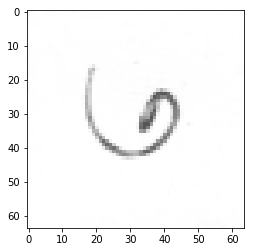

In [29]:
#print(model.predict(np.array([X_test_all[-100]])))
ll=np.argmax(model.predict(np.array([x_test_all[6282]/255.0])))
print(ll)
import matplotlib.pyplot as plt

print(paths_test_all[6282])
plt.imshow(x_test_all[6282], cmap=plt.get_cmap('gray'))

In [26]:
a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in labels:
  a[i]+=1
print(a)
#[0, 3, 0, 31, 10, 16765, 284, 3, 138, 392]

[1720, 1717, 1721, 1737, 2049, 1758, 1736, 1723, 1729, 1736]


In [0]:
from keras.models import load_model

#model.save(BASE+'models/'+'visual_attention_all_cnn_NUMTA_DB.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
m = load_model(BASE+'attention_accu99445.hdf5')
x_test_all = np.load(BASE+'x_test_all_128.npy')
predictions_prob=mod.predict(x_test_all)
labels=[np.argmax(pred) for pred in predictions_prob]
print(len(labels))

ValueError: ignored

In [8]:
from keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector
from keras.models import Model
from keras import backend as K

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.engine.topology import Layer
import tensorflow as tf
from keras.callbacks import TensorBoard

def MultiHeadsAttModel(l=8*8, d=512, dv=64, dout=512, nv = 8 ): #l=6*6, d=64*3 , dv=8*3, dout=32, nv = 8
    v1 = Input(shape = (l, d))
    q1 = Input(shape = (l, d))
    k1 = Input(shape = (l, d))

    v2 = Dense(dv*nv, activation = "relu")(v1) # we want every encoding to 64*3 as the initial encoding so dv*nv 8*3*8 W_V
    q2 = Dense(dv*nv, activation = "relu")(q1) #same W_Q
    k2 = Dense(dv*nv, activation = "relu")(k1) #same W_K

    v = Reshape([l, nv, dv])(v2) # for all the nv attention heads find those components
    q = Reshape([l, nv, dv])(q2) 
    k = Reshape([l, nv, dv])(k2) 

    att = Lambda(lambda x: K.batch_dot(x[0],x[1] ,axes=[3,3]) / np.sqrt(dv),
                 output_shape=(l, nv, nv))([q,k])# l, nv, nv
    att = Lambda(lambda x:  K.softmax(x) , output_shape=(l, nv, nv))(att)

    out = Lambda(lambda x: K.batch_dot(x[0], x[1],axes=[3,4]),  output_shape=(l, nv, dv))([att, v])
    out = Reshape([l, d])(out)
    
    out = Add()([out, q1])

    out = Dense(dout, activation = "relu")(out)
    m = Model(inputs=[q1,k1,v1], outputs=out)
    print(m.summary())
    return  Model(inputs=[q1,k1,v1], outputs=out)

class NormL(Layer):

    def __init__(self, **kwargs):
        super(NormL, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.a = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='ones',
                                      trainable=True)
        self.b = self.add_weight(name='kernel', 
                                      shape=(1,input_shape[-1]),
                                      initializer='zeros',
                                      trainable=True)
        super(NormL, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        eps = 0.000001
        mu = K.mean(x, keepdims=True, axis=-1)
        sigma = K.std(x, keepdims=True, axis=-1)
        ln_out = (x - mu) / (sigma + eps)
        return ln_out*self.a + self.b

    def compute_output_shape(self, input_shape):
        return input_shape
    
if __name__ == '__main__':   

    nb_classes = 10

    # the data, shuffled and split between tran and test sets
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("X_train original shape", X_train.shape)
    print("y_train original shape", y_train.shape)

    X_train = X_train.reshape(60000, 28,28,1)
    X_test = X_test.reshape(10000, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print("Training matrix shape", X_train.shape)
    print("Testing matrix shape", X_test.shape)

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    
    inp = Input(shape = (28,28,1))
    x = Conv2D(32,(2,2),activation='relu', padding='same')(inp)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64,(2,2),activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = Conv2D(64*3,(2,2),activation='relu')(x)
    
    if True:
        x = Reshape([6*6,64*3])(x) #number of words(6*6) * it's encoding(64*3) output by the encoder     
        att = MultiHeadsAttModel(l=6*6, d=64*3 , dv=8*3, dout=32, nv = 8 )
        x = att([x,x,x])#sent to the decoder to use attention heads to decode 
        x = Reshape([6,6,32])(x)
        x = NormL()(x)
    
    x = Flatten()(x) 
    x = Dense(256, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    print(model.summary())
    from keras.utils import plot_model
    plot_model(model, to_file='model.png', show_shapes=True)
    from IPython.display import Image
    Image(filename='model.png')
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    #tbCallBack = TensorBoard(log_dir='./Graph/mhatt1', histogram_freq=0, write_graph=True, write_images=True)
    #train_datagen = ImageDataGenerator(preprocessing_function=augment_img)
    #train_datagen.fit(x_train)
    model.fit(X_train, Y_train,
              batch_size=500, 
              epochs=2,
              verbose=1,          
              validation_data=(X_test, Y_test)
             )

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 36, 192)      0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 36, 192)      0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 36, 192)      37056       input_23[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 36, 192)      370

In [0]:
from imgaug import augmenters as iaa
from keras.regularizers import l2
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.math import add_n
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from PIL import Image
from keras import losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers.merge import add, concatenate
BASE = "drive/NumtaDB/"
X_train = np.load(BASE+'x_train_all_64.npy')
Y_train = np.load(BASE+'x_label_all_64.npy')
#X_train = X_train[:len(X_train)//2]
#Y_train = Y_train[:len(Y_train)//2]
print(len(X_train))
print(len(Y_train))
print(X_train.shape)
print(Y_train.shape)


x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, shuffle=True)
aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)
aug3 = iaa.Multiply((0.8, 1.2), per_channel=0.2)
aug4 = iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-45, 45),
        shear=(-8, 8))

aug5 = iaa.CoarseDropout(p=0.2, size_percent = 0.15)
aug6 = iaa.ContrastNormalization((0.75, 1.5))
aug7 = iaa.Pepper(p=0.05)

def augment_img(img):
    
    i = np.random.randint(0,9)

    if i==0:
        img_adapteq = img

    elif i==1:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==2:
        img_adapteq = aug2.augment_image(img)

    elif i==3:
        img_adapteq = aug3.augment_image(img)

    elif i==4:
        img_adapteq = aug4.augment_image(img)  
 
    elif i==5:
        img_adapteq = aug5.augment_image(img)  

    elif i==6:
        img_adapteq = aug6.augment_image(img)  
 
    elif i==7:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug7.augment_image(img_adapteq)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==8:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug2.augment_image(img_adapteq)
    
    img_adapteq = img_adapteq.astype('float32')
    img_adapteq /= 255.

    return img_adapteq
train_datagen = ImageDataGenerator(preprocessing_function=augment_img)
train_datagen.fit(x_train)
l2_lambda = 0.0001
def make_block(inp, k, depth):
    x1 = Conv2D(depth, (k, k), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda), dilation_rate = 1)(inp)
    x1 = BatchNormalization()(x1)
    x2 = Conv2D(depth, (k, k), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda), dilation_rate = 2)(inp)
    x2 = BatchNormalization()(x2)
    x3 = Conv2D(depth, (k, k), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda), dilation_rate = 4)(inp)
    x3 = BatchNormalization()(x3)
    return add([x1, x2, x3])

def dCNN():
    inp = Input(shape=(64, 64, 3))  
    x = make_block(inp, 5, 16)
    x = make_block(x, 5, 16)
    x = make_block(x, 5, 16)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    
    x = make_block(x, 3, 32)
    x = make_block(x, 3, 32)
    x = make_block(x, 3, 32)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    
    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x) 

    x = make_block(x, 3, 128)
    x = make_block(x, 3, 128)
    x = make_block(x, 3, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    

    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=inp, outputs=x) # To define a model, just specify its input and output layers
    return model

def all_cnn():
        
    inp = Input(shape=(height, width, depth)) 
    
    x = Conv2D(16, (5, 5), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(inp)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=inp, outputs=x) # To define a model, just specify its input and output layers
    return model
  
#model =all_cnn()
model = dCNN()
model.summary()
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

Using TensorFlow backend.


72045
72045
(72045, 64, 64, 3)
(72045, 10)


W0827 05:58:26.215000 139979077339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 05:58:26.248397 139979077339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 05:58:26.256499 139979077339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 05:58:26.312398 139979077339008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0827 05:58:26.313385 1399790773

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [0]:
BS = 500
#from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', 
                      metrics = ['accuracy'])

model.fit_generator(train_datagen.flow(x_train, y_train , batch_size = BS),
              epochs=10, verbose=1, validation_data = (x_test.astype('float32')/255., y_test),
                    steps_per_epoch=int(len(x_train))//BS,
                    validation_steps=int(len(x_test))/BS
                   )
'''
model.fit_generator( train_datagen.flow(x_train, y_train),
              epochs=2, verbose=1, validation_data = (x_test, y_test),
                    batch_size=BS
                   )

'''

Epoch 1/10
129/129 [==============================] - 299s 2s/step - loss: 0.2366 - acc: 0.9714 - val_loss: 0.1829 - val_acc: 0.9872
Epoch 2/10
129/129 [==============================] - 287s 2s/step - loss: 0.2128 - acc: 0.9741 - val_loss: 0.1881 - val_acc: 0.9802
Epoch 3/10
129/129 [==============================] - 287s 2s/step - loss: 0.1971 - acc: 0.9761 - val_loss: 0.1647 - val_acc: 0.9874
Epoch 4/10
 11/129 [=>............................] - ETA: 4:05 - loss: 0.1868 - acc: 0.9785

KeyboardInterrupt: ignored

In [0]:

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
#from ddrop.layers import DropConnect
from imgaug import augmenters as iaa
#from densenet import densenet121_model
from keras.applications.densenet import DenseNet121
#load data
X_train_all = np.load(BASE+'x_train_all_64.npy')
y_train_all = np.load(BASE+'x_label_all_64.npy')

#define augmnetation
aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)
aug3 = iaa.Multiply((0.8, 1.2), per_channel=0.2)
aug4 = iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-45, 45),
        shear=(-8, 8))

aug5 = iaa.CoarseDropout(p=0.2, size_percent = 0.15)
aug6 = iaa.ContrastNormalization((0.75, 1.5))
aug7 = iaa.Pepper(p=0.05)

def augment_img(img):
    
    i = np.random.randint(0,9)

    if i==0:
        img_adapteq = img

    elif i==1:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==2:
        img_adapteq = aug2.augment_image(img)

    elif i==3:
        img_adapteq = aug3.augment_image(img)

    elif i==4:
        img_adapteq = aug4.augment_image(img)  
 
    elif i==5:
        img_adapteq = aug5.augment_image(img)  

    elif i==6:
        img_adapteq = aug6.augment_image(img)  
 
    elif i==7:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug7.augment_image(img_adapteq)
        img_adapteq = aug1.augment_image(img_adapteq)

    elif i==8:
        img_adapteq = aug4.augment_image(img)
        img_adapteq = aug2.augment_image(img_adapteq)
    
    img_adapteq = img_adapteq.astype('float32')
    img_adapteq /= 255.

    return img_adapteq

class LearningRateDecay(Callback):
    '''Learning rate scheduler.
    # Arguments
        schedule: a function that takes an epoch index as input
            (integer, indexed from 0) and returns a new
            learning rate as output (float).
    '''
    def __init__(self, decay, every_n=1, verbose=0):
        Callback.__init__(self)
        self.decay = decay
        self.every_n = every_n
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        if not (epoch and epoch % self.every_n == 0):
            return

        assert hasattr(self.model.optimizer, 'lr'), \
            'Optimizer must have a "lr" attribute.'
        current_lr = K.get_value(self.model.optimizer.lr)
        new_lr = current_lr * self.decay
        if self.verbose > 0:
            print(' \nEpoch %05d: reducing learning rate' % (epoch))
            sys.stderr.write('new lr: %.5f\n' % new_lr)
        K.set_value(self.model.optimizer.lr, new_lr)
        
def make_block(inp, k, depth):
    
    x1 = Conv2D(depth, (k, k), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda), dilation_rate = 1)(inp)
    x1 = BatchNormalization()(x1)
    x2 = Conv2D(depth, (k, k), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda), dilation_rate = 2)(inp)
    x2 = BatchNormalization()(x2)
    x3 = Conv2D(depth, (k, k), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda), dilation_rate = 4)(inp)
    x3 = BatchNormalization()(x3)
    return add([x1, x2, x3])



def cnn_with_multi_scale_high_level_feature_aggregation():
    
    inp = Input(shape=(height, width, depth))  

    x = Conv2D(16, (5, 5), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(inp)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(32, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x) 

    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
       
    x = Flatten()(x)
    #x = DropConnect(Dense(128, activation='relu'), prob=0.2)(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=inp, outputs=x) 
    return model

def multi_scale_all_level_feature_aggregation_cnn_model():
    
    inp = Input(shape=(64, 64, 3))  
 
    x = make_block(inp, 5, 16)
    x = make_block(x, 5, 16)
    x = make_block(x, 5, 16)
    x = MaxPooling2D(pool_size=(2, 2))(x) 

    x = make_block(x, 3, 32)
    x = make_block(x, 3, 32)
    x = make_block(x, 3, 32)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    

    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = make_block(x, 3, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x) 

    x = make_block(x, 3, 128)
    x = make_block(x, 3, 128)
    x = make_block(x, 3, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    

    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=inp, outputs=x) # To define a model, just specify its input and output layers
    return model


def all_cnn():
        
    inp = Input(shape=(height, width, depth)) 
    
    x = Conv2D(16, (5, 5), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(inp)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (5, 5), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same',activation='relu', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=inp, outputs=x) # To define a model, just specify its input and output layers
    return model

height, width, depth = 64, 64, 3 
num_classes = 10 
l2_lambda = 0.0001 # use 0.0001 as a L2-regularisation factor
def Densenet121():
    
    base_model = Densenet121(img_rows=64, img_cols=64, color_type=3, num_classes=10, dropout_rate = 0.2)
    return base_model


def train_model(model, batch_size, epochs, x, y, n_fold, kf, model_name):

    i = 1
    for train_index, test_index in kf.split(x):
        
        x_train = x[train_index]; x_valid = x[test_index]
        y_train = y[train_index]; y_valid = y[test_index]

        x_valid = x_valid.astype('float32')/255.
        train_datagen = ImageDataGenerator(preprocessing_function=augment_img)
##
        train_datagen.fit(x_train)

        callbacks = [EarlyStopping(monitor='val_acc', patience=8, verbose=1, min_delta=1e-6),
             LearningRateDecay(0.5, every_n = 8, verbose=1),
             ModelCheckpoint(filepath= model_name + '_heavy_aug_fold_64' + str(i) + '.hdf5', verbose=1,monitor = 'val_acc',
                             save_best_only=True, save_weights_only=True, mode='auto')]
        
        model = model

        model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', 
                      metrics = ['accuracy'])

        model.fit_generator(train_datagen.flow(x_train, y_train, batch_size= batch_size),steps_per_epoch = len(x_train),
                      epochs=epochs, verbose=1, validation_data = (x_valid, y_valid), callbacks = callbacks)

        #model.load_weights(filepath= model_name + '_heavy_aug_fold_64' + str(i) + '.hdf5')



        i += 1

        if i <= n_fold:
            print('Now beginning training for {} fold {}\n\n'.format(model_name,i))
        else:
            print('Finished training {}\n\n!'.format(model_name))

models = [all_cnn(), multi_scale_all_level_feature_aggregation_cnn_model(), cnn_with_multi_scale_high_level_feature_aggregation(), Densenet121]
model_name = ['all_cnn', 'multi_scale_all_level_feature_aggregation_cnn_model','cnn_with_multi_scale_high_level_feature_aggregation','Densenet121']




#
from sklearn.model_selection import KFold
batch_size = 256
epochs = 30
n_fold = 5

##train start

for j in range(len(models)): 
    model = models[j]
    kf = KFold(n_splits=n_fold, shuffle=True)
    train_model(model, batch_size, epochs, X_train_all,y_train_all, n_fold, kf, model_name[j])
#    
##end training

Epoch 1/30
 6711/57636 [==>...........................] - ETA: 3:48:54 - loss: 0.1690 - acc: 0.9662

KeyboardInterrupt: ignored